In [1]:
import style
style._set_css_style("custom.css")

In [3]:
import numpy as np
from tabulate import tabulate as tab
from thermo.chemical import Chemical as chem
from thermo.chemical import Mixture as mix

### Distillation column:

#### Reference:  
Plant Design and Economics for Chemical Engineers, Fifth Edition

#### Problem.1
Design a sieve tray distillation column for the separation of methanol from water. Given that the mole fractions of methanol in the feed, distillate, and bottom are 0.3367, 0.96, and 0.003 respectively, and the feed temperature is 60°C. The top and distillate temperatures are 95°C and 60°C respectively, with a distillate flow rate of methanol at 1000 kg/h and a reflux ratio of 2.

#### Figure.1

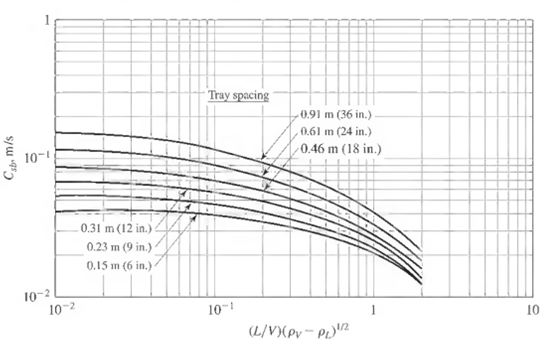

In [27]:
# Input Data
####################################################################################

Equipment_Name = input("Please enter the equipment Name: ")
Equipment_ID = input("Please enter the equipment ID: ")
Material = input("Please enter the material of construction: ")
Tray_Type = input("Please enter the trays type and material: ")
LK = input("Please enter the light key compound:")
HK = input("Please enter the heavy key compound: ")
Feed_LK = float(input("Please enter the light key mole fraction in the feed:" ))
Distillate_LK = float(input("Please enter the light key mole fraction in the distillate:" ))
Bottom_LK = float(input("Please enter the light key mole fraction in the bottom:" ))
Reflux_Ratio = float(input("Please enter the reflux ratio:" ))
Feed_Temp = float(input("Please enter the feed temperature in oC:" ))
Top_Temp = float(input("Please enter the top temperature in oC:" ))
Dist_Temp = float(input("Please enter the distillate temperature in oC:" ))
P = float(input("Please enter the operating pressure in (bar): "))
L = float(input("Please enter the mass flowrate of the liquid distillate kg/h:" ))
S =944  #is the allowable stress of the material 944 bar for Carbon Steel
E =0.9      #is the joint efficiency. 0.9 is recommended
CA = 0.00315  #is the corrosion allowance in m. depend of the fluid

# Physical properties preparation
####################################################################################
light_k = chem(LK,Feed_Temp+273,P*10**5)
heavy_k = chem(HK,Feed_Temp+273,P*10**5)
Vapor_P_LK = light_k.VaporPressure(Feed_Temp+273)
Vapor_P_HK = heavy_k.VaporPressure(Feed_Temp+273)
light_k_d = chem(LK,Dist_Temp+273,P*10**5)
light_k_t = chem(LK,Top_Temp+273,P*10**5)
p_L = light_k_d.rho
p_V = light_k_t.rho

# Design Calculations
#################################################################################### 

Relative_Volatility = Vapor_P_LK/Vapor_P_HK
V = L + Reflux_Ratio*L
factor = (L/V)*(p_V/p_L)**0.5
T_space =float(input(f" The (L/V)(pL/pV)^0.5 factor = {factor}, Please estimate the tray spacing in m:" ))
C_sb = float(input(f" The (L/V)(pL/pV)^0.5 factor = {factor}, Please select the C_sb from figure.1:" ))
V_nf = (C_sb * (Relative_Volatility/20)**0.2*((p_L-p_V)/p_V)**0.5)*0.5
A_n = (((V/3600)/p_V)/V_nf)/0.85
D = np.sqrt((4*A_n)/np.pi)
Stages_No = np.log((Distillate_LK/(1-Distillate_LK))/(Bottom_LK/(1-Bottom_LK)))/np.log(Relative_Volatility)
Stages_No = int(Stages_No+1) + 1
H = T_space * Stages_No 
thickness = (P * D / (2 * S * E -1.2 * P) + CA) * 1000    # in mm

# Design Sheet Code
#################################################################################### 

Column_sheet = [("Equipment Name",Equipment_Name),("Equipment ID",Equipment_ID),
                ("Material of Construction", Material),("Top Temperature (oC)",Top_Temp),
                ("Operating Pressure (bar)",P),("Diameter (m)","{:.4f}".format(D)),
                ("Height (m)","{:.3f}".format(H)),("Thickness (mm)","{:.4f}".format(thickness)),
                ("Trays Number",Stages_No),("Trays Type","SS-Sieve Trays")]
print(tab(Column_sheet,tablefmt="fancy_grid"))
Column_sheet.clear()

Please enter the equipment Name: Methanol Purification Column
Please enter the equipment ID: C - 101
Please enter the material of construction: Carbon Steel
Please enter the trays type and material: SS-Sieve Trays
Please enter the light key compound:methanol
Please enter the heavy key compound: water
Please enter the light key mole fraction in the feed:0.3367
Please enter the light key mole fraction in the distillate:0.96
Please enter the light key mole fraction in the bottom:0.003
Please enter the reflux ratio:2
Please enter the feed temperature in oC:60
Please enter the top temperature in oC:95
Please enter the distillate temperature in oC:60
Please enter the operating pressure in (bar): 1
Please enter the mass flowrate of the liquid distillate kg/h:1000
 The (L/V)(pL/pV)^0.5 factor = 0.012431134985051157, Please estimate the tray spacing in m:0.46
 The (L/V)(pL/pV)^0.5 factor = 0.012431134985051157, Please select the C_sb from figure.1:0.085
╒══════════════════════════╤═════════════